<a href="https://www.assemblyai.com/">
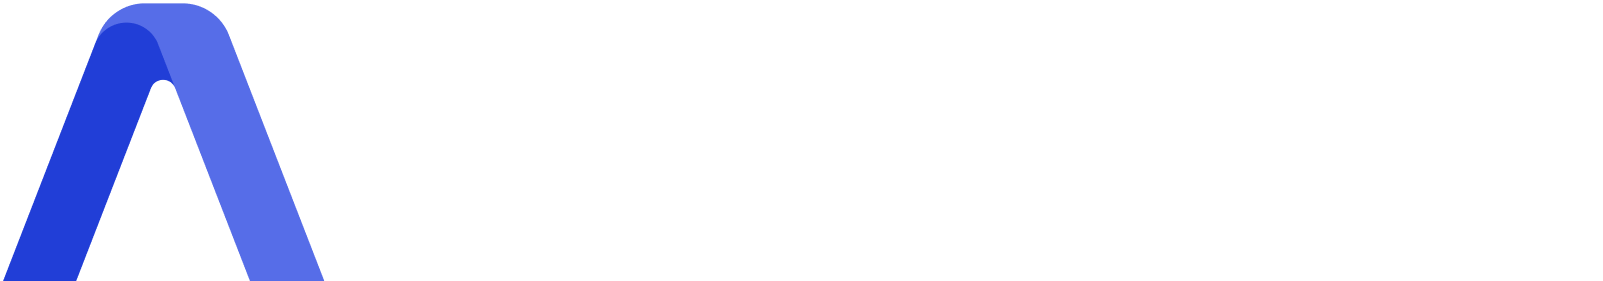
</a>
</img>

# Create A Speaker Timeline

In this guide, we'll show you how to plot a speaker timeline using results from the speaker diarization model.


### Get Started

Before we begin, make sure you have an AssemblyAI account and an API key. You can [sign up](https://assemblyai.com/dashboard/signup) for a free account and get your API key from your dashboard.

### Step-by-Step Instructions

Install the SDK.

In [ ]:
!pip install -U assemblyai
!pip install -U matplotlib

Import the `assemblyai `package and set the API key.

In [ ]:
import assemblyai as aai

aai.settings.api_key = "YOUR_API_KEY"

Create a `TranscriptionConfig` object and set speaker labels to `True`.

In [ ]:
config = aai.TranscriptionConfig(speaker_labels=True)

Create a `Transcriber` object.

In [ ]:
transcriber = aai.Transcriber()

Use the Transcriber object's `transcribe` method and pass in the audio file's path and `config` object as parameters. The transcribe method saves the results of the transcription to the `Transcriber` object's `transcript` attribute.

In [ ]:
transcript = transcriber.transcribe("./my-audio.mp3", config)

Alternatively, you can pass in a path to an audio file saved on the internet.

In [ ]:
transcript = transcriber.transcribe("https://example.org/audio.mp3", config)

Extract the utterances from the transcript and set this to `utterances`.



In [ ]:
utterances = transcript.utterances

Import the `matplotlib.pyplot` library. Then use the following `plot_speaker_timeline` function which results in a plot image of the speaker timeline. This function extracts the `start` and `end` timestamps of each `utterance` per `speaker` and plots the data onto the horizontal bar chart. The X and Y axis are labelled accordingly.

In [ ]:
import matplotlib.pyplot as plt

def plot_speaker_timeline(utterances):
    fig, ax = plt.subplots(figsize=(12, 4))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    speaker_colors = {}

    for utterance in utterances:
        start = utterance.start / 60000 # in minutes
        end = utterance.end / 60000 # in minutes
        speaker = utterance.speaker

        if speaker not in speaker_colors:
            speaker_colors[speaker] = colors[len(speaker_colors) % len(colors)] # set a colour for each new speaker

        ax.barh(speaker, end - start, left=start, color=speaker_colors[speaker], height=0.4) # create horizontal bar plot

    ax.set_xlabel('Time (mins)')
    ax.set_ylabel('Speakers')
    ax.set_title('Speaker Timeline')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

Finally, call the `plot_speaker_timeline` function passing `utterances` as a parameter to see the plot image result.

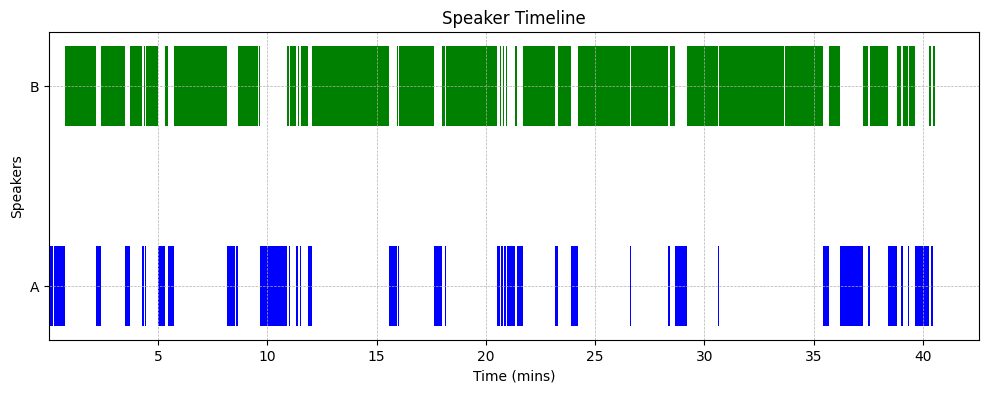

In [ ]:
plot_speaker_timeline(utterances)